In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
df = pd.read_csv("SP500.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03/01/2000,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,04/01/2000,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,05/01/2000,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,06/01/2000,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,07/01/2000,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2262 non-null   object 
 1   Open       2262 non-null   float64
 2   High       2262 non-null   float64
 3   Low        2262 non-null   float64
 4   Close      2262 non-null   float64
 5   Adj Close  2262 non-null   float64
 6   Volume     2262 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 123.8+ KB


In [5]:
df = df.fillna(method='ffill')

In [6]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [7]:
df.head()

,Date,Adj Close
0,03/01/2000,1455.219971
1,04/01/2000,1399.420044
2,05/01/2000,1402.109985
3,06/01/2000,1403.449951
4,07/01/2000,1441.469971


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2262 non-null   object 
 1   Adj Close  2262 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.5+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df = df.set_index(['Date'], drop=True)

In [11]:
df.head(5)

,Adj Close
Date,
2000-03-01,1455.219971
2000-04-01,1399.420044
2000-05-01,1402.109985
2000-06-01,1403.449951
2000-07-01,1441.469971


In [12]:
df.tail(5)

,Adj Close
Date,
2008-12-23,863.159973
2008-12-24,868.150024
2008-12-26,872.799988
2008-12-29,869.419983
2008-12-30,890.640015


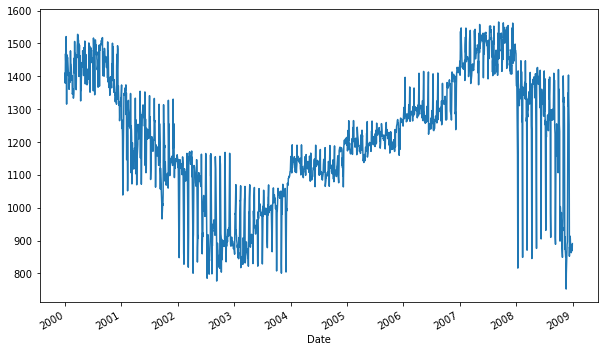

In [13]:
# df = df.sort_index()
plt.figure(figsize=(10, 6))
df['Adj Close'].plot();

In [14]:
split_date = pd.Timestamp('2008-01-02')

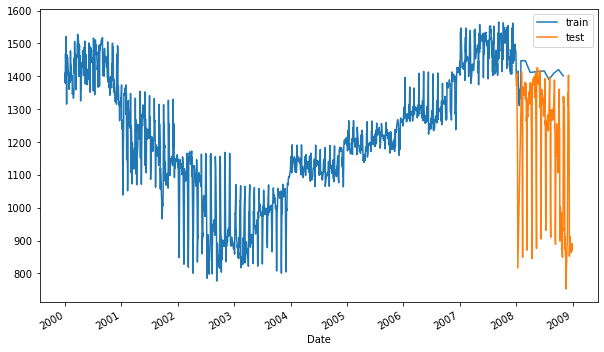

In [15]:
df =  df['Adj Close']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [16]:
train = train.to_numpy()
test = test.to_numpy()

In [17]:
train = train.reshape(-1,1)
test = test.reshape(-1,1)

In [18]:
# scale train and test data to [-1, 1]
scaler = MinMaxScaler()
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [19]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [20]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
2031/2031 [==============================] - 4s 2ms/step - loss: 0.0889
Epoch 2/100
2031/2031 [==============================] - 3s 1ms/step - loss: 0.0073
Epoch 3/100
2031/2031 [==============================] - 3s 2ms/step - loss: 0.0035
Epoch 4/100
2031/2031 [==============================] - 3s 1ms/step - loss: 0.0018
Epoch 5/100
2031/2031 [==============================] - 3s 1ms/step - loss: 0.0010
Epoch 6/100
2031/2031 [==============================] - 3s 1ms/step - loss: 6.5082e-04
Epoch 7/100
2031/2031 [==============================] - 3s 1ms/step - loss: 4.8505e-04
Epoch 8/100
2031/2031 [==============================] - 3s 2ms/step - loss: 4.0302e-04
Epoch 9/100
2031/2031 [==============================] - 3s 1ms/step - loss: 3.5911e-04
Epoch 10/100
2031/2031 [==============================] - 3s 1ms/step - loss: 3.3407e-04
Epoch 11/100
2031/2031 [==============================] - 3s 1ms/step - loss: 3.1909e-04
Epoch 12/100
2031/2031 [==========================

In [21]:
y_pred_train = nn_model.predict(X_train)
y_pred_test = nn_model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_pred_train)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))

The R2 score on the Train set is:	0.987
The R2 score on the Test set is:	0.971


In [22]:
from sklearn.metrics import mean_squared_error
lin_mse_train = mean_squared_error(y_pred_train, y_train)
lin_rmse_train = np.sqrt(lin_mse_train)
lin_mse_test = mean_squared_error(y_pred_test, y_test)
lin_rmse_test = np.sqrt(lin_mse_test)
print("The RMSE on the Train set is:\t{:0.3f}".format(lin_rmse_train))
print("The RMSE on the Test set is:\t{:0.3f}".format(lin_rmse_test))

The RMSE on the Train set is:	0.027
The RMSE on the Test set is:	0.042


In [23]:
from sklearn.metrics import mean_absolute_error
lin_mae_train = mean_squared_error(y_pred_train, y_train)
lin_mae_test = mean_squared_error(y_pred_test, y_test)
print("The MAE on the Train set is:\t{:0.3f}".format(lin_mae_train))
print("The MAE on the Test set is:\t{:0.3f}".format(lin_mae_test))

The MAE on the Train set is:	0.001
The MAE on the Test set is:	0.002


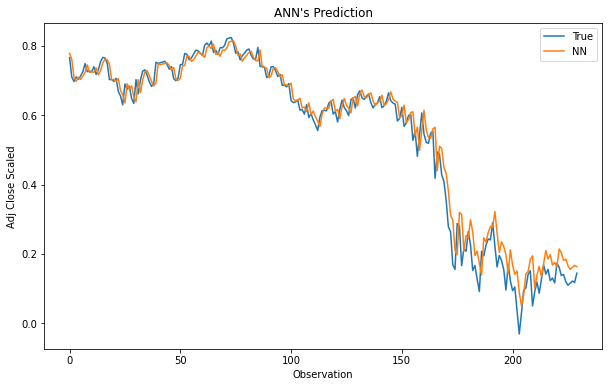

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();